In [115]:
from scipy.io import loadmat
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random

In [4]:
dataset = loadmat('hw4_data.mat')

In [8]:
dataset

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Mar 26 10:52:39 2020',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-3.03908092, -0.55880363],
        [-3.98549879,  2.99174352],
        [-1.98338158, -0.59446302],
        ...,
        [ 1.07170245, -0.70203065],
        [ 0.42140663, -1.22344659],
        [ 1.42240882, -0.57012443]])}

In [80]:
points = dataset['X']

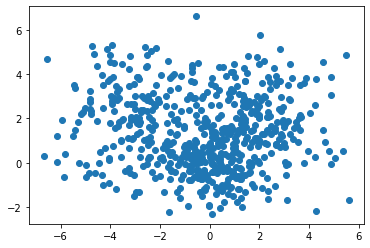

In [81]:
plt.scatter([p[0] for p in points], [p[1] for p in points])

[array([1.20829485, 3.02549228]),
 array([-4.13132897,  1.41054113]),
 array([-2.29484603, -1.31211081]),
 array([-0.31143159, -1.95715882]),
 array([3.9907242 , 4.43901686]),
 array([0.20448215, 2.49030312]),
 array([ 5.55877909, -1.78328874]),
 array([-4.85129182,  2.7026438 ])]

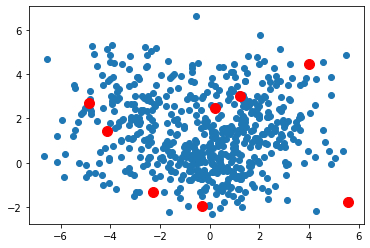

In [224]:
k = 8
centroids = []
for cluster in range(k):
    centroids.append(np.array([random.uniform(-6,6), random.uniform(-2,6)]))
plt.scatter(xs,ys)
plt.scatter([i[0] for i in centroids],[i[1] for i in centroids],c='red',s=100)
centroids

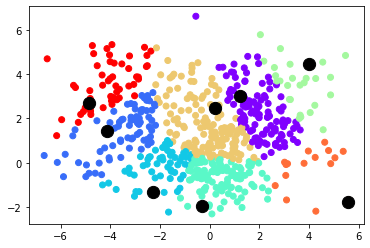

9.63131275712388


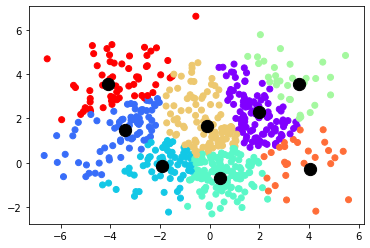

2.1602054615100705


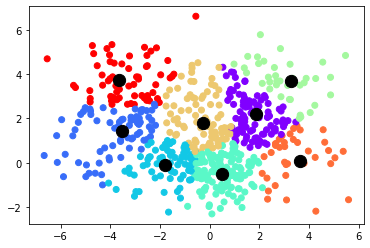

1.627473228619114


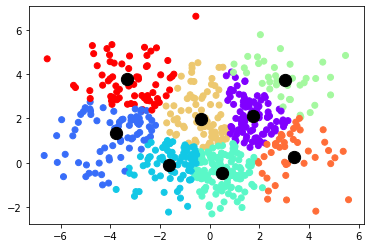

0.8642201381681476


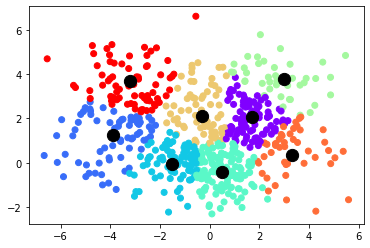

0.9005990810059171


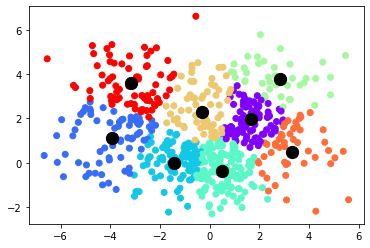

0.7507152983519019


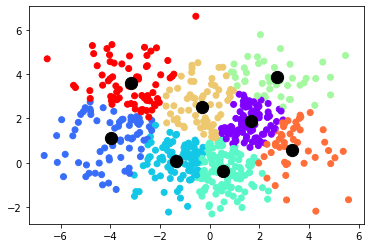

0.6232405937630733


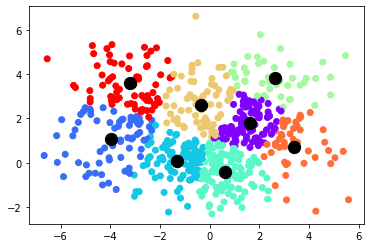

0.5347279758491588


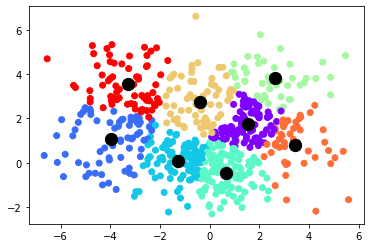

0.5349326169889961


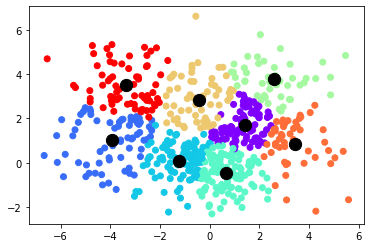

0.44676889174528017


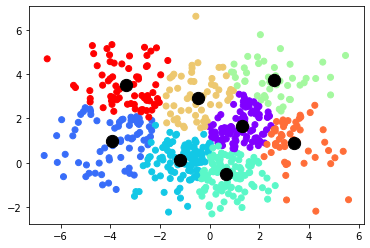

0.2907481468637928


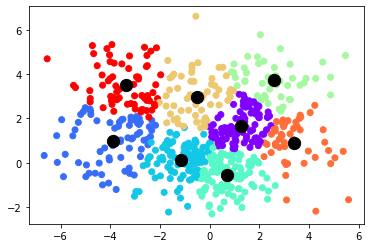

0.19862199658994314


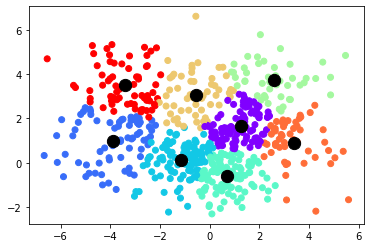

0.18535948970950317


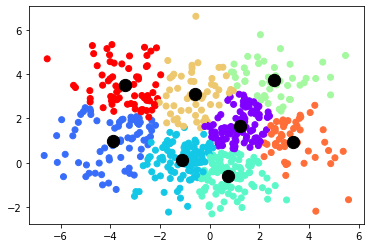

0.13519974830935524


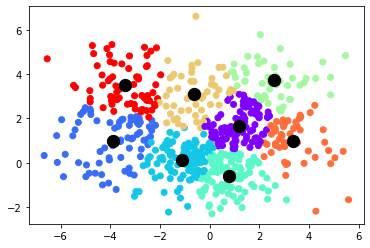

0.09618548341404584


In [225]:
while True:
    clusterLabels = []
    colors = matplotlib.cm.rainbow(np.linspace(0, 1, k))

    for point in points:
        centroidDistances = [0 for i in range(k)]
        for index, centroid in enumerate(centroids):
            distance = np.linalg.norm(point - centroid)
            centroidDistances[index] = distance
            #print(distance)
        minDistance = min(centroidDistances)
        minIndex = centroidDistances.index(minDistance)
        clusterLabels.append(minIndex)
        #print('belongs to centroid '+str(minIndex))
        #print('--------------')
    cs = [colors[i] for i in clusterLabels]
    plt.scatter(xs,ys,c=cs)
    plt.scatter([i[0] for i in centroids],[i[1] for i in centroids],c='black',s=150)
    plt.show()

    # recompute centroid centers

    newCentroids = [np.array([0.0,0.0]) for i in range(k)]
    counters = [0 for i in range(k)]
    for index, p in enumerate(clusterLabels):
        associatedLabel = p
        newCentroids[associatedLabel][0] += points[index][0]
        newCentroids[associatedLabel][1] += points[index][1]
        counters[associatedLabel] += 1

    for i in range(len(newCentroids)):
        newCentroids[i][0] /= counters[i]
        newCentroids[i][1] /= counters[i]
    
    # check if the sum of distances between the updated and previous centroids is smaller than 0.1
    diff = 0
    for i in range(k):
        diff += ((newCentroids[i][0]-centroids[i][0]) ** 2 + (newCentroids[i][1] - centroids[i][1]) ** 2) ** 0.5
    print(diff)
    if diff < 0.1:
        break
        
    centroids = newCentroids